##  Loading Essential Packages


We start by loading the `tidyverse` package, a collection of R packages designed for data science, offering functionalities for data manipulation, visualization, and analysis. Following that, we import the `nycflights13` package, which provides access to the `flights` dataset. This dataset includes detailed information about flights departing from New York City in the year 2013, serving as a valuable resource for data analysis and exploration tasks.

In [7]:
# Load the tidyverse package, a collection of R packages for data science
library(tidyverse)

# Load the nycflights13 package, which includes the flights dataset
library(nycflights13)




### View Dataset Structure:

Use glimpse() to get a compact display of the dataset's structure, including columns and their data types. This function provides a quick overview, showing you each column's name, data type (e.g., integer, double, character), and some example values.

In [3]:
glimpse(flights)


Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

### Dataset Summary

The summary() function generates summary statistics for each column in the dataset, such as Min, Mean, Max for numeric variables, and Frequency for factors.This summary is crucial for identifying potential anomalies (like extreme values) and understanding the distribution of data.

In [4]:
summary(flights)

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

### Column Names
Listing all column names can help in quickly identifying which variables are available for analysis.

In [5]:
colnames(flights)


[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

## Data Manipulation with Tidyverse/dplyr 

The tidyverse, particularly the dplyr package, offers a more intuitive syntax for data manipulation through a set of functions that work seamlessly with data frames and tibbles.


This code uses the dplyr package's filter function to select flights from the flights dataset that occurred on January 1s

In [6]:
# Filtering for flights on January 1st
filtered_flights <- flights %>% filter(month == 1, day == 1)


The %>% symbol is known as the pipe operator.
It is a key feature of the tidyverse. The pipe operator allows you to pass the result of one expression as the first argument to the next expression, facilitating a readable and intuitive workflow.
It enables chaining of functions in a way that is easier to read and write compared to nesting function calls

In this step, we're refining our dataset to focus on essential information by selecting specific columns from the `flights` dataset. We use the `select` function from the `dplyr` package (part of the `tidyverse`) to extract only the columns for the year of the flight (`flight_year`), the month, the day, and the gain in altitude (`gain`). This operation results in a new dataset, `selected_flights`, which contains just the information we're interested in analyzing further.

In [ ]:
# Selecting specific columns
selected_flights <- flights %>% select(flight_year, month, day, gain)


# Data Visualization

In this tutorial, we'll compare visualization techniques between base R and the `tidyverse`, specifically focusing on `ggplot2`. We'll start with base R to understand foundational plotting capabilities, highlighting their simplicity but also limitations in customization and complexity. Then, we'll transition to `ggplot2`, showcasing its enhanced flexibility, aesthetic options, and ability to handle layered information more effectively. This comparison aims to demonstrate the evolution from basic to advanced visualization techniques, underscoring the power of `ggplot2` within the `tidyverse` for sophisticated data analysis and presentation.

### Scatter Plot for Departure vs. Arrival Delays

This scatter plot shows the relationship between departure and arrival delays.
Limitation: Hard to layer more information or perform grouping by another variable, such as carrier.

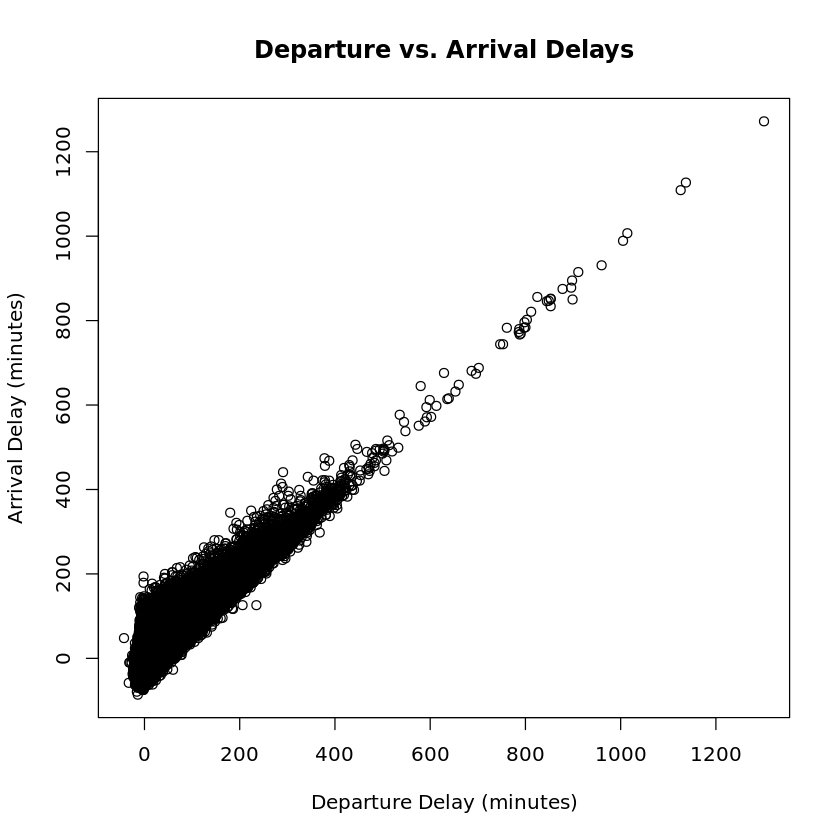

In [9]:
plot(flights$dep_delay, flights$arr_delay, xlab = "Departure Delay (minutes)", ylab = "Arrival Delay (minutes)", main = "Departure vs. Arrival Delays")


## Transition to ggplot2

After demonstrating the basics with R's base plotting system, you can highlight its limitations, especially in terms of flexibility, ease of customization, and aesthetic appeal. This sets the stage for introducing ggplot2, a powerful library that allows for creating complex and multi-layered graphics with clearer syntax and enhanced visual appeal

In [ ]:
ggplot(data = flights, aes(x = dep_delay, y = arr_delay)) +
  geom_point(alpha = 0.2) +
  labs(title = "Departure vs. Arrival Delays", x = "Departure Delay (min)", y = "Arrival Delay (min)")


Warning message:
“Removed 9430 rows containing missing values (`geom_point()`).”
